Copyright (c) Microsoft Corporation. All rights reserved. Licensed under the MIT License.

# Command and Control interface
This notebooks shows how to interact with the command&control server to observe the environment and initiate actions on the nodes where the attacker client is installed.

In [18]:
import networkx as nx
from tabulate import tabulate
import cyberbattle.simulation.model as model
import cyberbattle.simulation.actions as actions
import cyberbattle.simulation.commandcontrol as commandcontrol
import importlib
importlib.reload(model)
importlib.reload(actions)
importlib.reload(commandcontrol)
import plotly.offline as plo
plo.init_notebook_mode(connected=True)
%matplotlib inline 

We first create a simulation environment from a randomly generated network graph.

In [19]:
g = nx.erdos_renyi_graph(35,0.05,directed=True)
g = model.assign_random_labels(g)
env = model.Environment(network=g, vulnerability_library=dict([]), identifiers=model.SAMPLE_IDENTIFIERS)


We create the `CommandControl` object used to the environment and execute actions, and plot the graph explored so far.


In [20]:
c = commandcontrol.CommandControl(env)

Nodes disovered so far: [{'id': '34', 'status': 'owned'}]


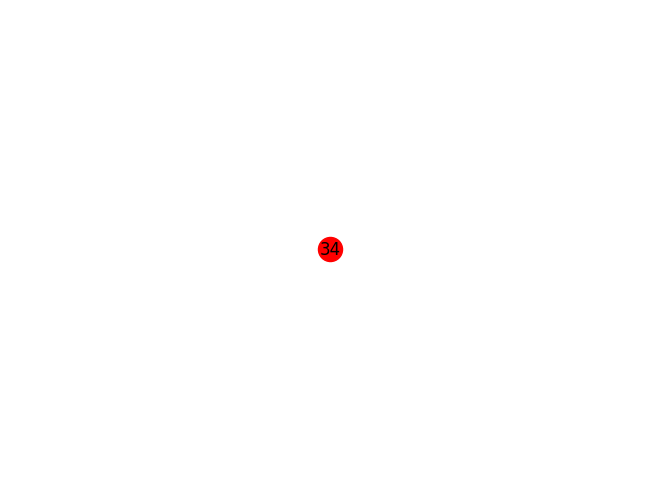

In [21]:
c.plot_nodes()
print("Nodes disovered so far: " + str(c.list_nodes()))
starting_node = c.list_nodes()[0]['id']

For debugging purpose it's also convient to view the internals of the environment via the `EnvironmentDebugging` object. For instance we can use it to plot the entire graph, including nodes that were not discovered yet by the attacker.

In [22]:
dbg = commandcontrol.EnvironmentDebugging(c)

DiGraph with 35 nodes and 50 edges


/tmp/ipykernel_156986/2228578043.py:2: DeprecationWarning:

info is deprecated and will be removed in version 3.0.




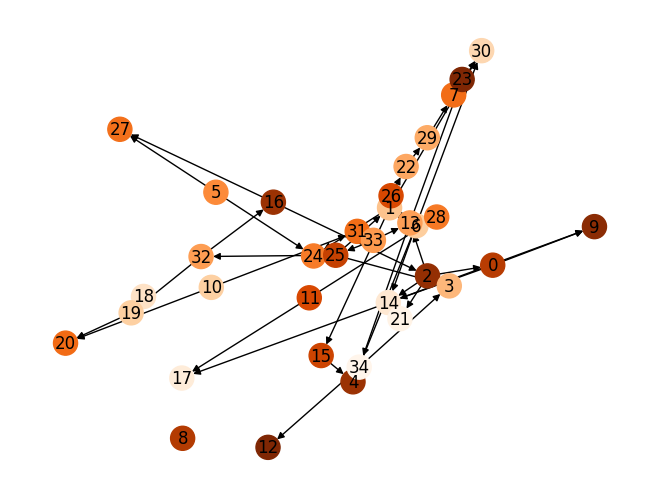

In [23]:
env.plot_environment_graph()
print(nx.info(env.network))

In [24]:
print(tabulate(c.list_all_attacks(),{}))

  id  status    properties                                                                    local_attacks                 remote_attacks
----  --------  ----------------------------------------------------------------------------  ----------------------------  ----------------
  34  owned     ['Win7', 'HyperV-VM', 'Win10', 'Azure-VM', 'Windows', 'GuestAccountEnabled']  ['RecentlyAccessedMachines']  []


In [25]:
outcome = c.run_attack(starting_node, 'RecentlyAccessedMachines')
outcome

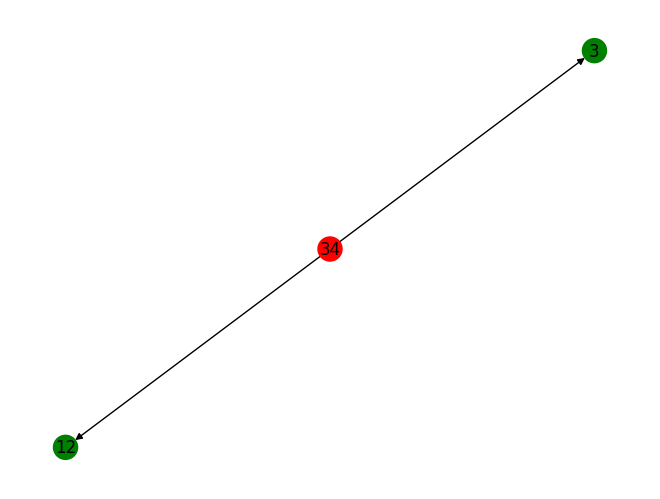

In [26]:
c.plot_nodes()

In [27]:
print(tabulate(c.list_nodes(),{}))

  id  status
----  ----------
  34  owned
   3  discovered
  12  discovered


In [28]:
print(tabulate(c.list_all_attacks(),{}))

  id  status      properties                                                                    local_attacks                 remote_attacks
----  ----------  ----------------------------------------------------------------------------  ----------------------------  ----------------
  34  owned       ['Win7', 'HyperV-VM', 'Win10', 'Azure-VM', 'Windows', 'GuestAccountEnabled']  ['RecentlyAccessedMachines']  []
   3  discovered                                                                                                              []
  12  discovered                                                                                                              []
